## Author: Loka Akash Reddy
### LGM VIP - Data Science September-2021
### Intermediate Level Task 1 - Exploratory Data Analysis - Terrorism
### Dataset : https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view
### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [7]:
df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'latin1')

In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Inspecting Data

In [9]:
df.shape

(181691, 135)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [45]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [13]:
df.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt

In [14]:
print("Countries Wise Number of Terrorism")
df['country_txt'].value_counts()

Countries Wise Number of Terrorism


Iraq             24636
Pakistan         14368
Afghanistan      12731
India            11960
Colombia          8306
                 ...  
St. Lucia            1
South Vietnam        1
Andorra              1
North Korea          1
Vatican City         1
Name: country_txt, Length: 205, dtype: int64

In [15]:
print("Country with the most terrorism acts is: ", df['natlty1_txt'].value_counts().index[0])

Country with the most terrorism acts is:  Iraq


In [18]:
print("Country with the least terrorism acts is: ", df['natlty1_txt'].value_counts().index[-1])

Country with the least terrorism acts is:  Antigua and Barbuda


In [19]:
print("Most common type of attack is: ", df['attacktype1_txt'].value_counts().index[0])

Most common type of attack is:  Bombing/Explosion


### Exploratory Data Analysis

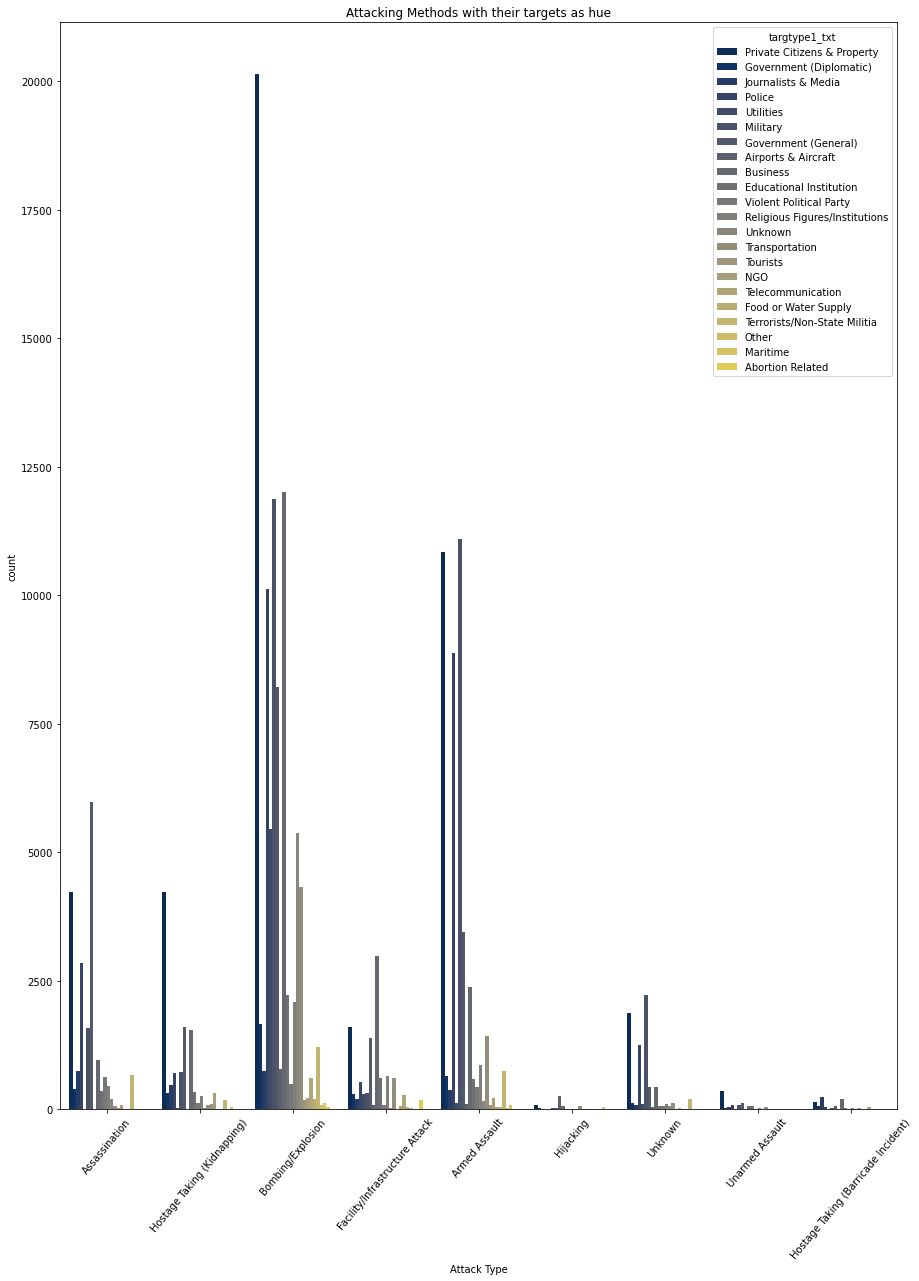

In [21]:
plt.subplots(figsize=(15,20))
sns.countplot('attacktype1_txt', data=df, palette='cividis', hue = df['targtype1_txt'])
plt.xticks(rotation=50)
plt.xlabel('Attack Type')
plt.title('Attacking Methods with their targets as hue')
plt.show()

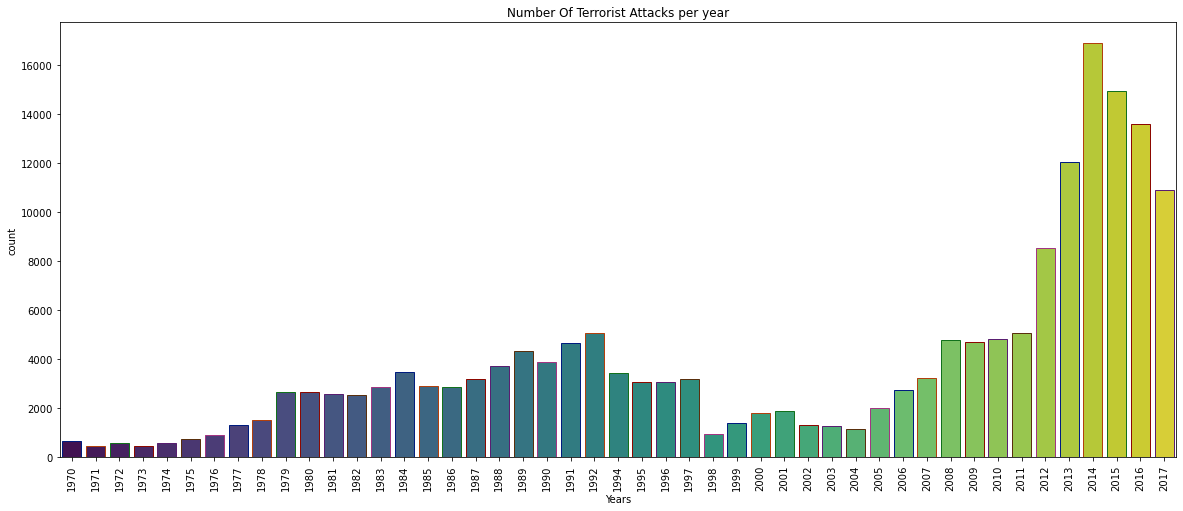

In [22]:
plt.subplots(figsize=(20,8))
sns.countplot('iyear', data=df, palette='viridis', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Number Of Terrorist Attacks per year')
plt.show()

In [23]:
print("Maximum Attacks mostly happened during the year of ",df['iyear'].value_counts().index[0])

Maximum Attacks mostly happened during the year of  2014


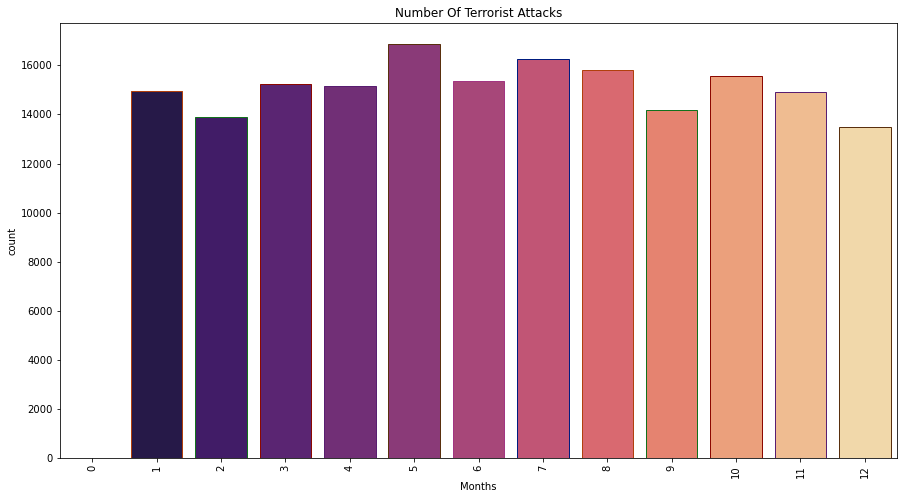

In [25]:
plt.subplots(figsize=(15,8))
sns.countplot('imonth',data=df,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('Number Of Terrorist Attacks')
plt.show()

In [26]:
print("Maximum Attacks mostly happened during the month of ",df['imonth'].value_counts().index[0])

Maximum Attacks mostly happened during the month of  5


In [27]:
df_cp=df.copy()
df_cp['affected']=df['nkill']+df['nwound']
df_cp['affected'].value_counts()

0.0      63297
1.0      30157
2.0      15278
3.0      10273
4.0       7549
         ...  
392.0        1
247.0        1
419.0        1
422.0        1
294.0        1
Name: affected, Length: 341, dtype: int64

In [28]:
df1 = df_cp.sort_values(by='affected', ascending=False)[:20]

In [29]:
heat =df1.pivot_table(index='country_txt', columns='iyear', values='affected')
heat.fillna(0,inplace=True)

Text(0.5, 1.0, 'Heatmap for Attacked with respect to Country and Year')

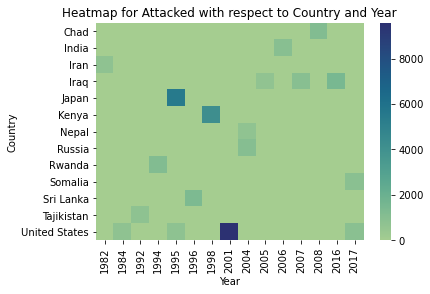

In [30]:
sns.heatmap(heat, cmap='crest')
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Heatmap for Attacked with respect to Country and Year')

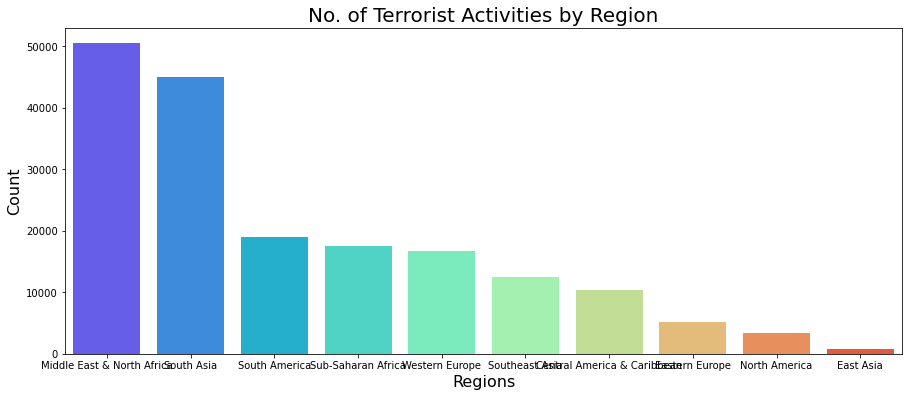

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(df['region_txt'].value_counts()[:10].index,df['region_txt'].value_counts()[:10].values, palette='rainbow')
plt.title('No. of Terrorist Activities by Region', fontsize=20)
plt.xlabel('Regions', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

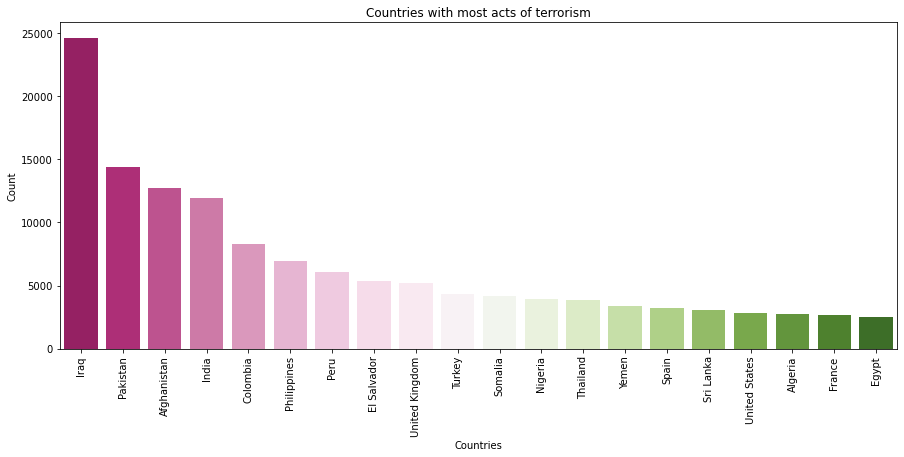

In [32]:
plt.subplots(figsize=(15,6))
sns.barplot(df['country_txt'].value_counts().index[:20],df['country_txt'].value_counts()[:20].values,palette='PiYG')
plt.title('Countries with most acts of terrorism')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

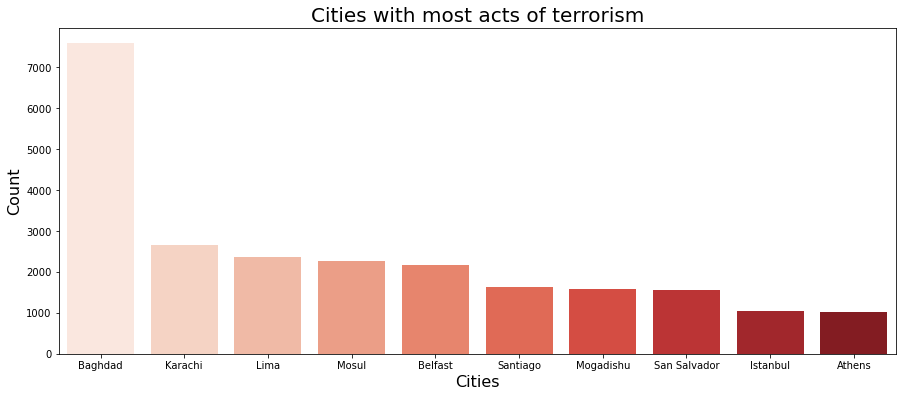

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(df['city'].value_counts()[1:11].index,df['city'].value_counts()[1:11].values, palette="Reds")
plt.title('Cities with most acts of terrorism', fontsize=20)
plt.xlabel('Cities',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

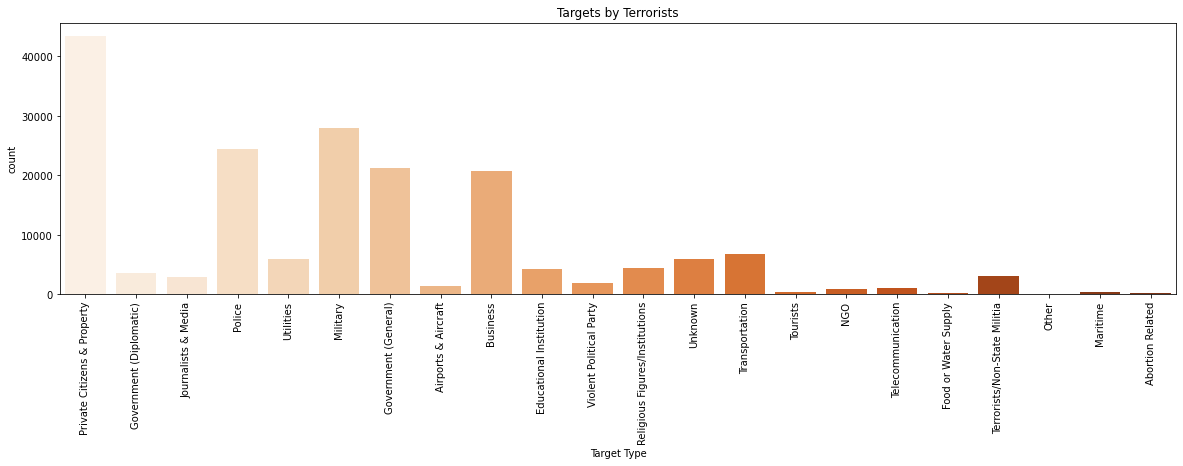

In [34]:
plt.subplots(figsize=(20,5))
sns.countplot('targtype1_txt', data=df, palette='Oranges')
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Targets by Terrorists')
plt.show()

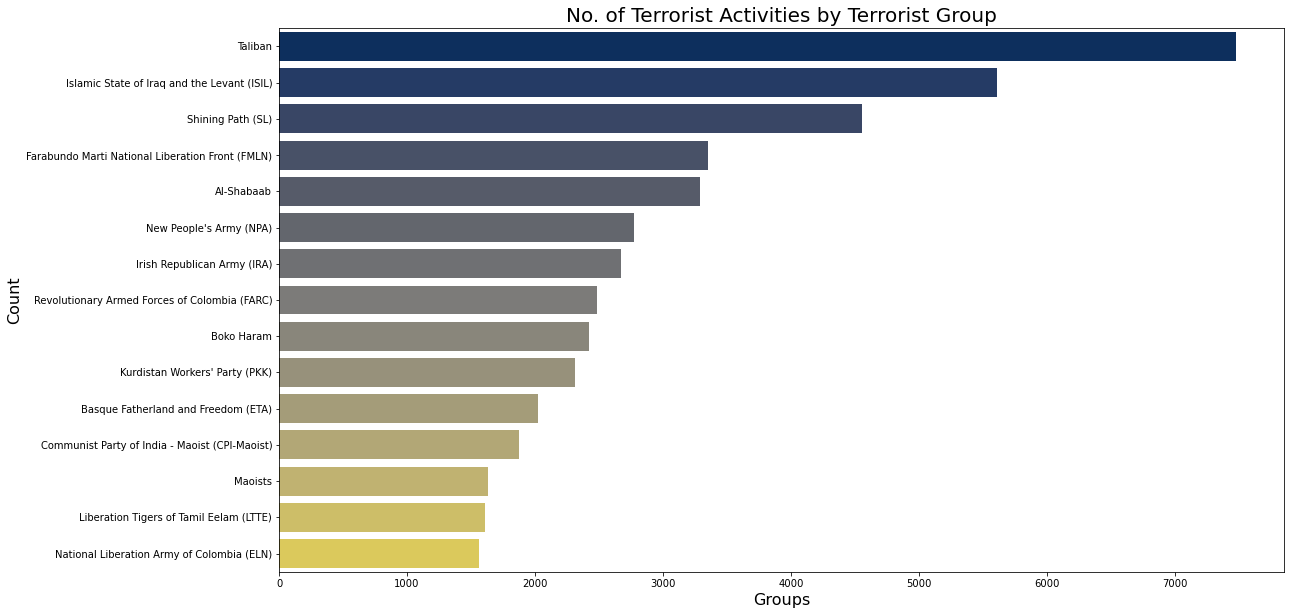

In [39]:
plt.figure(figsize=(18,10))
sns.barplot(df['gname'].value_counts()[1:16].values, df['gname'].value_counts()[1:16].index, orient='h', palette='cividis')
plt.title('No. of Terrorist Activities by Terrorist Group', fontsize=20)
plt.xlabel('Groups', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

### Number Of People Affected Analyzation

In [40]:
df2 = df[['gname','country_txt','nkill', 'nwound']]
df2 = df2.groupby(['gname','country_txt'], axis=0).sum().sort_values(['nkill', 'nwound'], ascending=False).drop('Unknown').reset_index().head(10)
df2

,gname,country_txt,nkill,nwound
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0,23697.0
1,Taliban,Afghanistan,29269.0,27871.0
2,Boko Haram,Nigeria,16917.0,7671.0
3,Shining Path (SL),Peru,11595.0,3030.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0,10991.0
5,Al-Shabaab,Somalia,8176.0,6025.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0,4049.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0,4031.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0,728.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0,9518.0


In [41]:
df3 = df.groupby('iyear')['country_txt'].sum().to_frame()
df3

,country_txt
iyear,
1970,Dominican RepublicMexicoPhilippinesGreeceJapan...
1971,United StatesWest Germany (FRG)United StatesUn...
1972,PanamaPhilippinesKuwaitSpainArgentinaUnited Ki...
1973,ColombiaIrelandDominican RepublicUnited Kingdo...
1974,ItalyFranceItalyBoliviaUnited KingdomArgentina...
1975,PakistanSpainSpainSpainUnited KingdomNetherlan...
1976,TurkeyTurkeyPortugalWest Germany (FRG)United S...
1977,JapanJapanJapanFranceFranceSpainItalySpainItal...
1978,BrazilEl SalvadorItalyItalyItalyJapanNetherlan...


In [42]:
casualties_by_year = df.pivot_table(columns='iyear', values=('nkill','nwound'), aggfunc='sum')
casualties_by_year

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
nkill,174.0,173.0,566.0,370.0,539.0,617.0,674.0,456.0,1459.0,2100.0,...,9157.0,9273.0,7827.0,8246.0,15497.0,22273.0,44490.0,38853.0,34871.0,26445.0
nwound,212.0,82.0,409.0,495.0,865.0,617.0,756.0,518.0,1600.0,2506.0,...,18998.0,19138.0,15947.0,14659.0,25445.0,37688.0,41128.0,44043.0,40001.0,24927.0


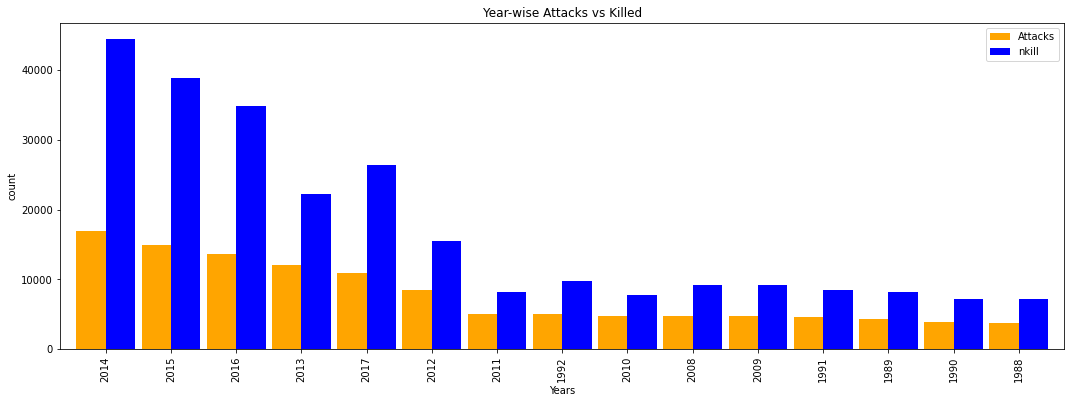

In [44]:
df3=df['iyear'].value_counts()[:15].to_frame()
df3.columns=['Attacks']
data=df.groupby('iyear')['nkill'].sum().to_frame()
df3.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9,color=['orange','blue'])
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Year-wise Attacks vs Killed')
plt.xlabel('Years')
plt.ylabel('count')
plt.show()

### Result and Conclusion

1.Year with most Attacks and Kills is **'2014'**

2.Country with highest Attacks and Kills is **'Iraq'**

3.Region with highest Attacks and Kills is **'Middle East and North Africa'**

4.City with highest Attacks and Kills is **'Baghdad'**

5.Highest Number of Attacks are of **'Bombing/Explosion'** Attack type

6.Highest Number of Kills is due to **'Armed Assault'** Attack type

7.Most Attacked and Killed Targets are **'Private Citizen and Property'**

8.Highest Number of Attacks by **'Taliban'** Group

9.Highest Number of kills by **'Islamic State of Iraq and the Levant(ISIL)'** Group